In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
 # Initialize the control system
Error = ctrl.Antecedent(np.arange(-200, 201, 1), 'Error')
DerivativeError = ctrl.Antecedent(np.arange(-30, 30.1, 0.1), 'DerivativeError')
DeltaSpeed = ctrl.Consequent(np.arange(-2.0, 2.01, 0.01), 'DeltaSpeed')

In [3]:
Error['negative_large'] = fuzz.trimf(Error.universe, [-100, -100, -50])
Error['negative_small'] = fuzz.trimf(Error.universe, [-60, -25, 0])
Error['zero'] = fuzz.trimf(Error.universe, [-15, 0, 15])
Error['positive_small'] = fuzz.trimf(Error.universe, [0, 25, 60])
Error['positive_large'] = fuzz.trimf(Error.universe, [50, 100, 100])

DerivativeError['negative_large'] = fuzz.trimf(DerivativeError.universe, [-20, -20, -10])
DerivativeError['negative_small'] = fuzz.trimf(DerivativeError.universe, [-15, -5, 0])
DerivativeError['zero'] = fuzz.trimf(DerivativeError.universe, [-5, 0, 5])
DerivativeError['positive_small'] = fuzz.trimf(DerivativeError.universe, [0, 5, 15])
DerivativeError['positive_large'] = fuzz.trimf(DerivativeError.universe, [10, 20, 20])

DeltaSpeed['negative_large'] = fuzz.trimf(DeltaSpeed.universe, [-2.0, -2.0, -1.0])
DeltaSpeed['negative_small'] = fuzz.trimf(DeltaSpeed.universe, [-1.5, -0.5, 0])
DeltaSpeed['zero'] = fuzz.trimf(DeltaSpeed.universe, [-0.5, 0, 0.5])
DeltaSpeed['positive_small'] = fuzz.trimf(DeltaSpeed.universe, [0, 0.5, 1.5])
DeltaSpeed['positive_large'] = fuzz.trimf(DeltaSpeed.universe, [1.0, 2.0, 2.0])

In [4]:
Error['negative'] = fuzz.gaussmf(Error.universe, -50, 20)
Error['zero'] = fuzz.gaussmf(Error.universe, 0, 5)
Error['positive'] = fuzz.gaussmf(Error.universe, 50, 20)

DerivativeError['negative'] = fuzz.gaussmf(DerivativeError.universe, -10, 5)
DerivativeError['zero'] = fuzz.gaussmf(DerivativeError.universe, 0, 2.5)
DerivativeError['positive'] = fuzz.gaussmf(DerivativeError.universe, 10, 5)

DeltaSpeed['negative'] = fuzz.gaussmf(DeltaSpeed.universe, -1, 0.5)
DeltaSpeed['zero'] = fuzz.gaussmf(DeltaSpeed.universe, 0, 0.25)
DeltaSpeed['positive'] = fuzz.gaussmf(DeltaSpeed.universe, 1, 0.5)

In [5]:
Error['negative'] = fuzz.trimf(Error.universe, [-200, -100, -10])
Error['zero'] = fuzz.trimf(Error.universe, [-20, 0, 20])
Error['positive'] = fuzz.trimf(Error.universe, [10, 100, 200])

C:\Users\ardy\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


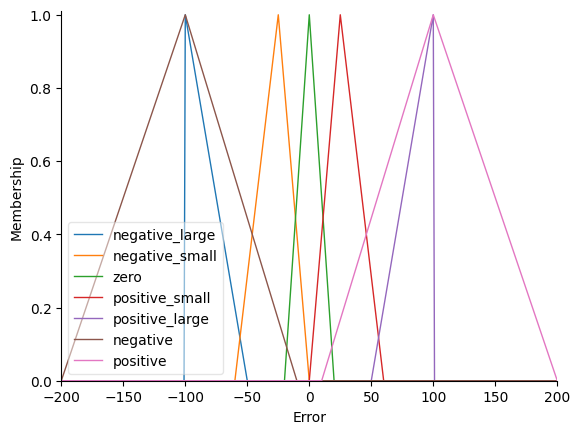

In [6]:
Error.view()

In [7]:
DerivativeError['negative'] = fuzz.trimf(DerivativeError.universe, [-30, -15, 0])
DerivativeError['zero'] = fuzz.trimf(DerivativeError.universe, [-6, 0, 6])
DerivativeError['positive'] = fuzz.trimf(DerivativeError.universe, [0, 15, 30])

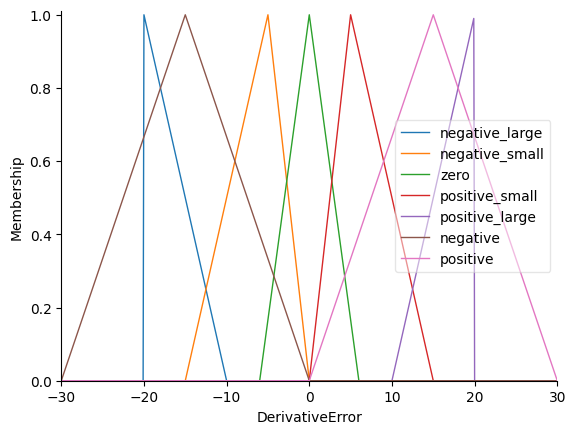

In [8]:
DerivativeError.view()

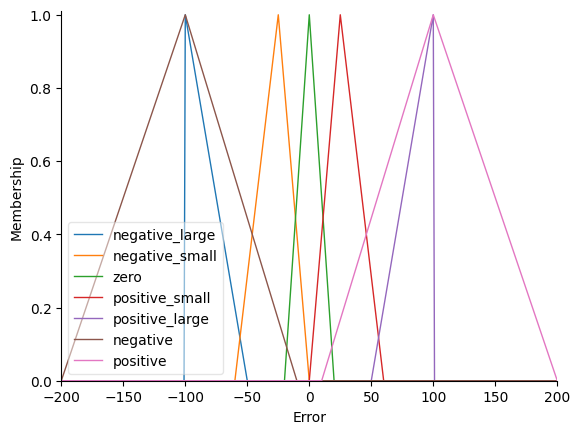

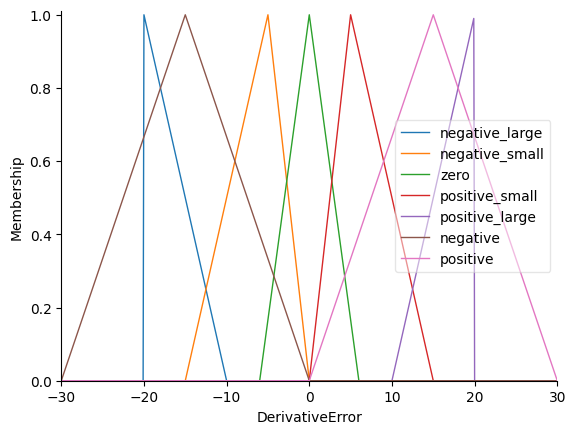

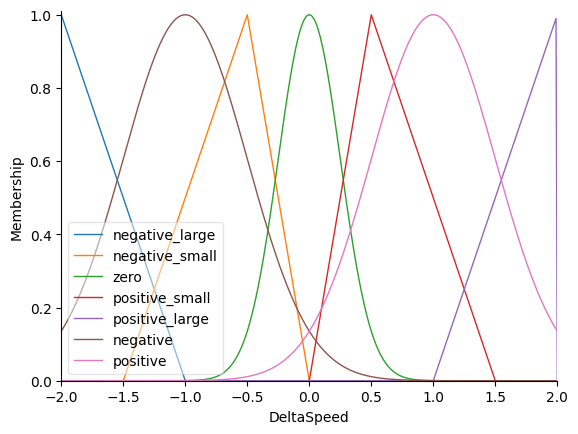

In [9]:
Error.view()
DerivativeError.view()
DeltaSpeed.view()

In [10]:
rules = [
    ctrl.Rule(Error['NB'] & DerivativeError['NB'], DeltaSpeed['KB']),
    ctrl.Rule(Error['NB'] & DerivativeError['NM'], DeltaSpeed['KB']),
    ctrl.Rule(Error['NB'] & DerivativeError['ZE'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NB'] & DerivativeError['PM'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NB'] & DerivativeError['PB'], DeltaSpeed['ST']),

    ctrl.Rule(Error['NM'] & DerivativeError['NB'], DeltaSpeed['KB']),
    ctrl.Rule(Error['NM'] & DerivativeError['NM'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NM'] & DerivativeError['ZE'], DeltaSpeed['KS']),
    ctrl.Rule(Error['NM'] & DerivativeError['PM'], DeltaSpeed['ST']),
    ctrl.Rule(Error['NM'] & DerivativeError['PB'], DeltaSpeed['ST']),

    ctrl.Rule(Error['ZE'] & DerivativeError['NB'], DeltaSpeed['KS']),
    ctrl.Rule(Error['ZE'] & DerivativeError['NM'], DeltaSpeed['ST']),
    ctrl.Rule(Error['ZE'] & DerivativeError['ZE'], DeltaSpeed['ST']),
    ctrl.Rule(Error['ZE'] & DerivativeError['PM'], DeltaSpeed['TS']),
    ctrl.Rule(Error['ZE'] & DerivativeError['PB'], DeltaSpeed['TS']),

    ctrl.Rule(Error['PM'] & DerivativeError['NB'], DeltaSpeed['ST']),
    ctrl.Rule(Error['PM'] & DerivativeError['NM'], DeltaSpeed['ST']),
    ctrl.Rule(Error['PM'] & DerivativeError['ZE'], DeltaSpeed['TS']),
    ctrl.Rule(Error['PM'] & DerivativeError['PM'], DeltaSpeed['TS']),
    ctrl.Rule(Error['PM'] & DerivativeError['PB'], DeltaSpeed['TB']),

    ctrl.Rule(Error['PB'] & DerivativeError['NB'], DeltaSpeed['ST']),
    ctrl.Rule(Error['PB'] & DerivativeError['NM'], DeltaSpeed['TS']),
    ctrl.Rule(Error['PB'] & DerivativeError['ZE'], DeltaSpeed['TB']),
    ctrl.Rule(Error['PB'] & DerivativeError['PM'], DeltaSpeed['TB']),
    ctrl.Rule(Error['PB'] & DerivativeError['PB'], DeltaSpeed['TB'])
]

ValueError: Membership function 'NB' does not exist for Antecedent Error.
Available options: 'negative_large'; 'negative_small'; 'zero'; 'positive_small'; 'positive_large'; 'negative', or 'positive'.

In [ ]:
rules

In [ ]:
DeltaSpeedControl = ctrl.ControlSystem(rules)
DeltaSpeedSim = ctrl.ControlSystemSimulation(DeltaSpeedControl)

In [ ]:
# Test dengan nilai masukan
DeltaSpeedSim.input['Error'] = 0.5
DeltaSpeedSim.input['DerivativeError'] = -0.5
DeltaSpeedSim.compute()

In [11]:
print(f"Output Delta Speed: {DeltaSpeedSim.output['DeltaSpeed']}")
DeltaSpeed.view(sim=DeltaSpeedSim)

NameError: name 'DeltaSpeedSim' is not defined

In [14]:
Error = ctrl.Antecedent(np.arange(-320, 321, 1), 'Error')
DeltaError = ctrl.Antecedent(np.arange(-320, 321, 1), 'DeltaError')
DeltaSpeed = ctrl.Consequent(np.arange(-15, 16, 1), 'DeltaSpeed')

Error['NL'] = fuzz.trimf(Error.universe, [-320, -320, -150])
Error['NS'] = fuzz.trimf(Error.universe, [-320, -150, 0])
Error['Z'] = fuzz.trimf(Error.universe, [-150, 0, 150])
Error['PS'] = fuzz.trimf(Error.universe, [0, 150, 320])
Error['PL'] = fuzz.trimf(Error.universe, [150, 320, 320])

DeltaError['NL'] = fuzz.trimf(DeltaError.universe, [-320, -320, -150])
DeltaError['NS'] = fuzz.trimf(DeltaError.universe, [-320, -150, 0])
DeltaError['Z'] = fuzz.trimf(DeltaError.universe, [-150, 0, 150])
DeltaError['PS'] = fuzz.trimf(DeltaError.universe, [0, 150, 320])
DeltaError['PL'] = fuzz.trimf(DeltaError.universe, [150, 320, 320])

DeltaSpeed['DL'] = fuzz.trimf(DeltaSpeed.universe, [-15, -15, -10])
DeltaSpeed['DS'] = fuzz.trimf(DeltaSpeed.universe, [-15, -10, 0])
DeltaSpeed['NC'] = fuzz.trimf(DeltaSpeed.universe, [-10, 0, 10])
DeltaSpeed['IS'] = fuzz.trimf(DeltaSpeed.universe, [0, 10, 15])
DeltaSpeed['IL'] = fuzz.trimf(DeltaSpeed.universe, [10, 15, 15])

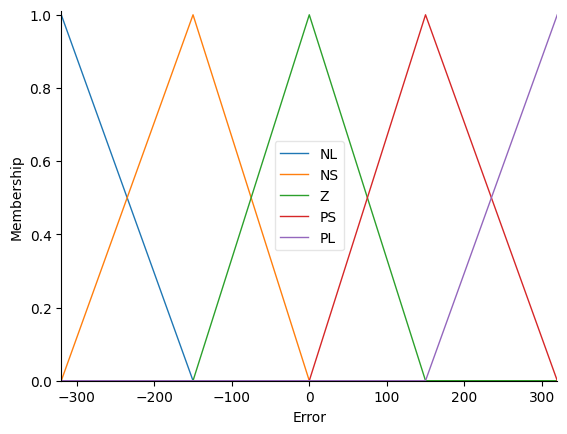

In [15]:
Error.view()

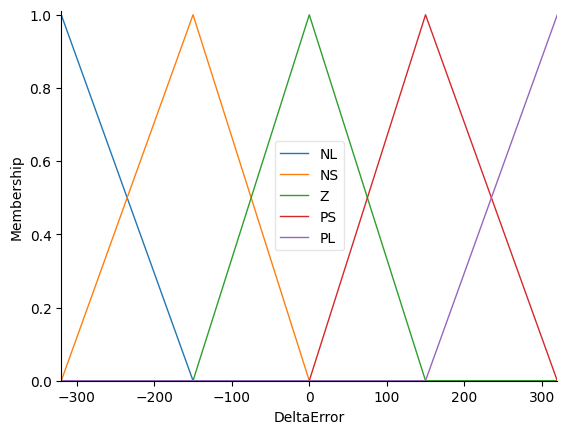

In [16]:
DeltaError.view()

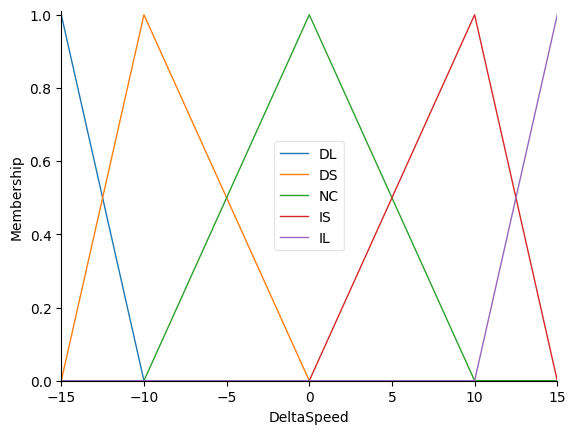

In [17]:
DeltaSpeed.view()

In [13]:
rule1 = ctrl.Rule(Error['NL'] & DeltaError['NL'], DeltaSpeed['DL'])
rule2 = ctrl.Rule(Error['NL'] & DeltaError['NS'], DeltaSpeed['DL'])
rule3 = ctrl.Rule(Error['NL'] & DeltaError['Z'], DeltaSpeed['DL'])
rule4 = ctrl.Rule(Error['NL'] & DeltaError['PS'], DeltaSpeed['DS'])
rule5 = ctrl.Rule(Error['NL'] & DeltaError['PL'], DeltaSpeed['NC'])

rule6 = ctrl.Rule(Error['NS'] & DeltaError['NL'], DeltaSpeed['DL'])
rule7 = ctrl.Rule(Error['NS'] & DeltaError['NS'], DeltaSpeed['DS'])
rule8 = ctrl.Rule(Error['NS'] & DeltaError['Z'], DeltaSpeed['DS'])
rule9 = ctrl.Rule(Error['NS'] & DeltaError['PS'], DeltaSpeed['NC'])
rule10 = ctrl.Rule(Error['NS'] & DeltaError['PL'], DeltaSpeed['IS'])

rule11 = ctrl.Rule(Error['Z'] & DeltaError['NL'], DeltaSpeed['DS'])
rule12 = ctrl.Rule(Error['Z'] & DeltaError['NS'], DeltaSpeed['NC'])
rule13 = ctrl.Rule(Error['Z'] & DeltaError['Z'], DeltaSpeed['NC'])
rule14 = ctrl.Rule(Error['Z'] & DeltaError['PS'], DeltaSpeed['IS'])
rule15 = ctrl.Rule(Error['Z'] & DeltaError['PL'], DeltaSpeed['IL'])

rule16 = ctrl.Rule(Error['PS'] & DeltaError['NL'], DeltaSpeed['NC'])
rule17 = ctrl.Rule(Error['PS'] & DeltaError['NS'], DeltaSpeed['NC'])
rule18 = ctrl.Rule(Error['PS'] & DeltaError['Z'], DeltaSpeed['IS'])
rule19 = ctrl.Rule(Error['PS'] & DeltaError['PS'], DeltaSpeed['IL'])
rule20 = ctrl.Rule(Error['PS'] & DeltaError['PL'], DeltaSpeed['IL'])

rule21 = ctrl.Rule(Error['PL'] & DeltaError['NL'], DeltaSpeed['NC'])
rule22 = ctrl.Rule(Error['PL'] & DeltaError['NS'], DeltaSpeed['IS'])
rule23 = ctrl.Rule(Error['PL'] & DeltaError['Z'], DeltaSpeed['IS'])
rule24 = ctrl.Rule(Error['PL'] & DeltaError['PS'], DeltaSpeed['IL'])
rule25 = ctrl.Rule(Error['PL'] & DeltaError['PL'], DeltaSpeed['IL'])

DeltaSpeed_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15,
    rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25
])
self.DeltaSpeedSim = ctrl.ControlSystemSimulation(DeltaSpeed_ctrl)

NameError: name 'self' is not defined